In [1]:
from utils.SZDataset import *
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from net.SketchNetwork import *

In [2]:
%matplotlib inline

In [3]:
net = SketchNetwork()

In [4]:
transf = transforms.Compose([transforms.RandomRotation((-45,45), fill=(255, 255, 255, 1)),
                                 transforms.RandomHorizontalFlip(p=0.5),
                                 transforms.Resize((224, 224)), 
                                 transforms.ToTensor()])

# Inicialize the dataset

In [5]:
sketch_dataset = SketchZoomDataset(data_sketch_root= "data/",
                                        net=net, #use to select the best negative sample.
                                        plotter=None, 
                                        n=10, 
                                        stage= "test", 
                                        image_size= 224, 
                                        categories=["Airplane","Bag","Cap","Car","Chair","Earphone","Guitar","Knife","Lamp","Laptop","Motorbike","Mug","Pistol","Rocket","Skateboard","Table"], 
                                        transform= transf, 
                                        device='cpu')

#### The dataset return three zooms for three type of images: Anchor, Positive, Negative

In [6]:
data = sketch_dataset.__getitem__(5)
anchor, positive, negative = data

In [7]:
anchor = anchor.numpy().reshape(3, 3, 224, 224)
positive = positive.numpy().reshape(3, 3, 224, 224)
negative = negative.numpy().reshape(3, 3, 224, 224)

# Zooms for Anchor, Positive and Negative

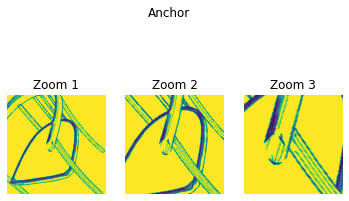

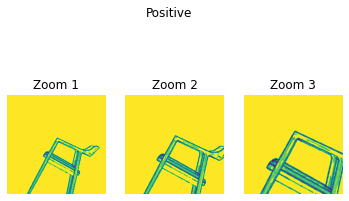

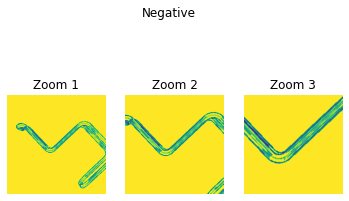

In [8]:
for x, t in zip([anchor, positive, negative], ['Anchor', 'Positive', 'Negative']):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.suptitle(t)
    ax1.set_title('Zoom 1')
    ax2.set_title('Zoom 2')
    ax3.set_title('Zoom 3')
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')

    ax1.imshow(x[0][0].reshape(224, 224))
    ax2.imshow(x[1][0].reshape(224, 224))
    ax3.imshow(x[2][0].reshape(224, 224))

# Obtain the features for Anchor, Positive and Negative

In [9]:
_anchor, _positive, _negative = data
_anchor, _positive , _negative = Variable(_anchor).to('cpu'), Variable(_positive).to('cpu') , Variable(_negative).to('cpu')
feature_anchor, feature_positive , feature_negative = net(_anchor.unsqueeze(0), _positive.unsqueeze(0), _negative.unsqueeze(0), 1)

In [10]:
feature_anchor[0], feature_positive[0], feature_negative[0]

(tensor([ 0.0105,  0.0159,  0.0094,  0.0056,  0.0106,  0.0079,  0.0155, -0.0035,
          0.0079,  0.0048, -0.0018,  0.0089,  0.0009, -0.0106, -0.0045,  0.0155,
          0.0100,  0.0142,  0.0010,  0.0075, -0.0031,  0.0132,  0.0207,  0.0086,
          0.0028,  0.0095,  0.0142,  0.0166,  0.0057,  0.0078,  0.0087,  0.0029,
         -0.0034,  0.0153,  0.0121,  0.0080,  0.0046,  0.0022,  0.0141,  0.0019,
          0.0118,  0.0105,  0.0081,  0.0159,  0.0136,  0.0051,  0.0054,  0.0104,
          0.0086,  0.0156,  0.0086,  0.0071,  0.0052, -0.0090,  0.0079,  0.0008,
         -0.0041,  0.0140,  0.0160,  0.0143,  0.0121,  0.0008,  0.0085,  0.0134,
          0.0043,  0.0207,  0.0087,  0.0108,  0.0004,  0.0135,  0.0171,  0.0077,
          0.0089,  0.0055, -0.0037, -0.0043,  0.0155,  0.0118,  0.0086,  0.0007,
          0.0132,  0.0122,  0.0123,  0.0123,  0.0088,  0.0105,  0.0164,  0.0130,
          0.0048,  0.0098, -0.0088,  0.0113,  0.0162,  0.0096,  0.0057, -0.0010,
          0.0082,  0.0010, -